# Assignment - BASF Digital Farming
Submitted by Neelesh Bhalla (neelesh.bhalla@fs-students.de)

In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file into a new Pandas dataframe.
weather_data = pd.read_csv("weather.csv")
weather_data

,Loc_ID,latitude,longitude,date,minimum temperature,maximum temperature,GDD,accmulated GDD,daylength
0,-12.038055_-55.5397222_2018-12-06,-12.03055,-55.539722,12/6/2018,21.66,30.30,NaN,NaN,NaN
1,-12.038055_-55.5397222_2018-12-06,NaN,NaN,12/7/2018,22.17,30.67,NaN,NaN,NaN
2,-12.038055_-55.5397222_2018-12-06,NaN,NaN,12/8/2018,22.13,27.91,NaN,NaN,NaN
3,-12.038055_-55.5397222_2018-12-06,NaN,NaN,12/9/2018,22.81,27.39,NaN,NaN,NaN
4,-12.038055_-55.5397222_2018-12-06,NaN,NaN,12/10/2018,21.96,26.60,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
195,-12.038055_-55.5397222_2018-12-06,NaN,NaN,6/19/2019,17.37,34.31,NaN,NaN,NaN
196,-12.038055_-55.5397222_2018-12-06,NaN,NaN,6/20/2019,18.00,33.41,NaN,NaN,NaN
197,-12.038055_-55.5397222_2018-12-06,NaN,NaN,6/21/2019,18.30,33.19,NaN,NaN,NaN
198,-12.038055_-55.5397222_2018-12-06,NaN,NaN,6/22/2019,17.16,32.95,NaN,NaN,NaN


## Question 1: 
### Extract latitude and longitude values from the first column Loc_ID (a combination index holding latitude, longitude and planting date information, the format is ‘latitude_longitude_plantingDate’).

In [3]:
# Use the str.split() method to split the values in the column based on the "_" separator and extract the latitude and longitude values as 'float'.
# The apply() method applies the lambda function to each value in the specified column.

weather_data['latitude'] = weather_data['Loc_ID'].apply(lambda x: float(x.split("_")[0]))
weather_data['longitude'] = weather_data['Loc_ID'].apply(lambda x: float(x.split("_")[1]))


weather_data


,Loc_ID,latitude,longitude,date,minimum temperature,maximum temperature,GDD,accmulated GDD,daylength
0,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,12/6/2018,21.66,30.30,NaN,NaN,NaN
1,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,12/7/2018,22.17,30.67,NaN,NaN,NaN
2,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,12/8/2018,22.13,27.91,NaN,NaN,NaN
3,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,12/9/2018,22.81,27.39,NaN,NaN,NaN
4,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,12/10/2018,21.96,26.60,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
195,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,6/19/2019,17.37,34.31,NaN,NaN,NaN
196,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,6/20/2019,18.00,33.41,NaN,NaN,NaN
197,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,6/21/2019,18.30,33.19,NaN,NaN,NaN
198,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,6/22/2019,17.16,32.95,NaN,NaN,NaN


### Visualising the provided data for familiarization and initial insights

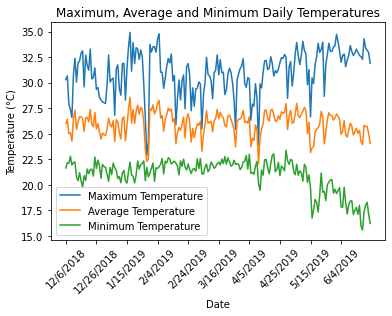

In [4]:
# Plot the 'minimum temperature', 'maximum temperature' and 'average temperature' in a single plot
plt.plot(weather_data['date'], weather_data['maximum temperature'], label='Maximum Temperature')
plt.plot(weather_data['date'], (weather_data['minimum temperature'] + weather_data['maximum temperature'])/2, label='Average Temperature')
plt.plot(weather_data['date'], weather_data['minimum temperature'], label='Minimum Temperature')


plt.legend()
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Maximum, Average and Minimum Daily Temperatures')

indices = np.arange(0, len(weather_data), 20) # every 20th date
plt.xticks(indices, weather_data['date'][indices], rotation=45)

plt.show()

In [5]:
# Get a summary of the 'Average Daily Temperature'

average_daily_temperature =  (weather_data['minimum temperature'] + weather_data['maximum temperature'])/2
summary_avg_temp = average_daily_temperature.describe()
print(summary_avg_temp)

count    200.000000
mean      26.009775
std        1.148153
min       22.040000
25%       25.340000
50%       26.172500
75%       26.790000
max       28.580000
dtype: float64


In [6]:
# It is noteworthy that the minimum value of 'Average Daily Temperature' is 22.04 which is well above the 'lower threshold temperature' of 0. 
# Also the maximum value of 'Average Daily Temperature' is 28.58 which is below the 'upper threshold temperature, of 30.
# So we should not have '0' value of GDD for any row in the avaiable data.

## Question 2: 
### Calculate daily GDD values for crop winter wheat. Hint: for winter wheat, to calculate GDD, you can use 0 as lower threshold temperature and 30 as upper threshold

In [7]:
# Growing Degree Days (GDD) is a measure of heat accumulation used in agriculture and horticulture to predict the development of crops and pests. 
# It is calculated based on the difference between the daily average temperature and a lower threshold temperature, which is the minimum temperature required for growth of a particular crop or pest.

# Define a function to calculate the daily GDD value
def gdd(t_min, t_max, lower_threshold, upper_threshold):
    t_avg = (t_min + t_max) / 2
    
    if t_avg <= lower_threshold or t_avg >= upper_threshold:
        return 0 # If the average temperature is below the lower threshold or above the upper threshold, return 0 as the GDD value.
    else:
        return t_avg - lower_threshold # If not, return the difference between the average temperature and the lower threshold as the GDD value.

# Declare the lower and upper threshold temperature for winter wheat.
lower_threshold = 0 
upper_threshold = 30

# Loop through each row in the weather_data dataframe using iterrows method and calculate the daily GDD value
for index, row in weather_data.iterrows():
    weather_data.loc[index, 'GDD'] = gdd(row['minimum temperature'], row['maximum temperature'], lower_threshold, upper_threshold)

weather_data

,Loc_ID,latitude,longitude,date,minimum temperature,maximum temperature,GDD,accmulated GDD,daylength
0,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,12/6/2018,21.66,30.30,25.980,NaN,NaN
1,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,12/7/2018,22.17,30.67,26.420,NaN,NaN
2,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,12/8/2018,22.13,27.91,25.020,NaN,NaN
3,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,12/9/2018,22.81,27.39,25.100,NaN,NaN
4,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,12/10/2018,21.96,26.60,24.280,NaN,NaN
...,...,...,...,...,...,...,...,...,...
195,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,6/19/2019,17.37,34.31,25.840,NaN,NaN
196,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,6/20/2019,18.00,33.41,25.705,NaN,NaN
197,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,6/21/2019,18.30,33.19,25.745,NaN,NaN
198,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,6/22/2019,17.16,32.95,25.055,NaN,NaN


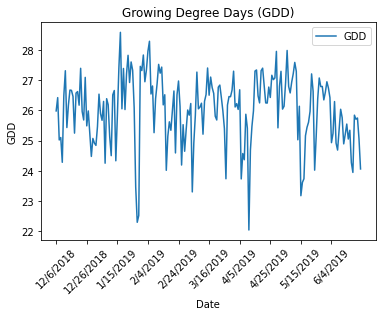

In [8]:
# Plot the 'Growing Degree Days (GDD)'
plt.plot(weather_data['date'], weather_data['GDD'], label='GDD')


plt.legend()
plt.xlabel('Date')
plt.ylabel('GDD')
plt.title('Growing Degree Days (GDD)')

indices = np.arange(0, len(weather_data), 20) # every 20th date
plt.xticks(indices, weather_data['date'][indices], rotation=45)

plt.show()

In [9]:
# Get a summary of the 'GDD' column
summary = weather_data['GDD'].describe()
print(summary)

count    200.000000
mean      26.009775
std        1.148153
min       22.040000
25%       25.340000
50%       26.172500
75%       26.790000
max       28.580000
Name: GDD, dtype: float64


## Question 3: 
### Sum up daily GDD values to generate accumulated GDD values on daily basis

In [10]:
# Accumulated GDD is the sum of the daily GDD values calculated over a period of time, usually from the beginning of the growing season of a crop or pest, to a specific date. 
# It is used as an indicator of the heat accumulation that has occurred over a period of time and is used to predict the development and growth of crops and pests.

# Rename the 'accmulated GDD' column to 'accumulated GDD' 
weather_data = weather_data.rename(columns={'accmulated GDD': 'accumulated GDD'})

# Calculate accumulated GDD values
weather_data.loc[0, 'accumulated GDD'] = weather_data.loc[0, 'GDD']
for i in range(1, len(weather_data)):
    weather_data.loc[i, 'accumulated GDD'] = weather_data.loc[i-1, 'accumulated GDD'] + weather_data.loc[i, 'GDD']

weather_data

,Loc_ID,latitude,longitude,date,minimum temperature,maximum temperature,GDD,accumulated GDD,daylength
0,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,12/6/2018,21.66,30.30,25.980,25.980,NaN
1,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,12/7/2018,22.17,30.67,26.420,52.400,NaN
2,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,12/8/2018,22.13,27.91,25.020,77.420,NaN
3,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,12/9/2018,22.81,27.39,25.100,102.520,NaN
4,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,12/10/2018,21.96,26.60,24.280,126.800,NaN
...,...,...,...,...,...,...,...,...,...
195,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,6/19/2019,17.37,34.31,25.840,5101.390,NaN
196,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,6/20/2019,18.00,33.41,25.705,5127.095,NaN
197,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,6/21/2019,18.30,33.19,25.745,5152.840,NaN
198,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,6/22/2019,17.16,32.95,25.055,5177.895,NaN


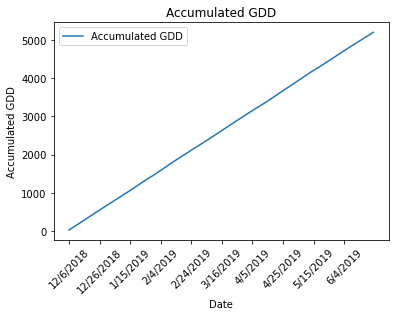

In [11]:
# Plot the 'Accumulated Growing Degree Days (GDD)'
plt.plot(weather_data['date'], weather_data['accumulated GDD'], label='Accumulated GDD')


plt.legend()
plt.xlabel('Date')
plt.ylabel('Accumulated GDD')
plt.title('Accumulated GDD')

indices = np.arange(0, len(weather_data), 20) # every 20th date
plt.xticks(indices, weather_data['date'][indices], rotation=45)

plt.show()

## Question 4: 
### Calculate day length values for each day using the latitude, longitude and day of the year

In [12]:
# Daylength is the amount of daylight in a given location for a given day of the year. 
# It is calculated based on the latitude, longitude, and the day of the year, and reflects the variation in daylight over the course of the year caused by the tilt of the Earth's axis relative to the sun.

# Using 'Astral' python package to estimate daylength. Documentation for Astral Project - https://sffjunkie.github.io/astral/

import datetime
from astral.sun import sun
from astral import LocationInfo

for i, row in weather_data.iterrows():

    # Create a LocationInfo object for each row using the latitude and longitude values
    city = LocationInfo(row['latitude'], row['longitude'])

    # Convert the date string in the 'date' column to a date object using strptime
    date = datetime.datetime.strptime(row['date'], '%m/%d/%Y').date()

    # Calculate the sun information for the given date and location using the sun function from the Astral Project
    s = sun(city.observer, date=date)

    # Calculate the daylength by subtracting sunrise from sunset
    daylength = s['sunset'] - s['sunrise']

    # Convert the daylength to hours and update the 'daylength' column
    weather_data.loc[i, 'daylength'] = daylength.total_seconds() / 3600


weather_data


,Loc_ID,latitude,longitude,date,minimum temperature,maximum temperature,GDD,accumulated GDD,daylength
0,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,12/6/2018,21.66,30.30,25.980,25.980,8.032190
1,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,12/7/2018,22.17,30.67,26.420,52.400,8.006443
2,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,12/8/2018,22.13,27.91,25.020,77.420,7.982271
3,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,12/9/2018,22.81,27.39,25.100,102.520,7.959703
4,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,12/10/2018,21.96,26.60,24.280,126.800,7.938766
...,...,...,...,...,...,...,...,...,...
195,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,6/19/2019,17.37,34.31,25.840,5101.390,16.618295
196,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,6/20/2019,18.00,33.41,25.705,5127.095,16.621086
197,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,6/21/2019,18.30,33.19,25.745,5152.840,16.622194
198,-12.038055_-55.5397222_2018-12-06,-12.038055,-55.539722,6/22/2019,17.16,32.95,25.055,5177.895,16.621621


In [13]:
# The coordinates [-12.038055, -55.539722] in the assignment correspond to a location in Brazil, South America somewhere between the Equator and the Tropic of Capricorn.
# So, as a loose reference check, for such a location, it is safe to assume the MEAN of the Daylength values to be closer to half a day (~ 12 hours). 
# We can verify this point below.

In [14]:
# Get a summary of the 'Daylength' column
summary = weather_data['daylength'].describe()
print(summary)

count    200.000000
mean      11.964164
std        3.142468
min        7.822248
25%        8.777476
50%       11.841312
75%       15.009396
max       16.622194
Name: daylength, dtype: float64


In [15]:
# As a second loose reference check, for such a location, it is safe to assume the Daylength values will increase from December till June (period of data) as we move from Winters to Summers.
# We can verify this points below by visualisation.

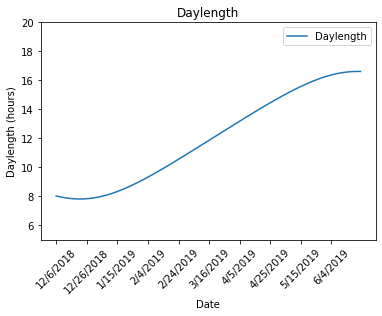

In [16]:
# Plot the 'Daylength'
plt.plot(weather_data['date'], weather_data['daylength'], label='Daylength')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Daylength (hours)')
plt.title('Daylength')

indices = np.arange(0, len(weather_data), 20) # every 20th date
plt.xticks(indices, weather_data['date'][indices], rotation=45)

plt.ylim(bottom=5, top=20)

plt.show()

